<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detecting Malicious URL using Machine Learning:**

#library imported:

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Read the Dataset:

In [2]:
urls_data = pd.read_csv("/content/urldata.csv")

In [3]:
urls_data.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [6]:
urls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450176 non-null  int64 
 1   url         450176 non-null  object
 2   label       450176 non-null  object
 3   result      450176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
urls_data.tail(20)

,Unnamed: 0,url,label,result
450156,450156,http://orlandoresorthouses.com/wwe/script/mail...,malicious,1
450157,450157,http://knitwear.ru/Linkedlnen.html,malicious,1
450158,450158,http://dizcorona.com/Via/Validation,malicious,1
450159,450159,http://ayareview-document.pdf-iso.webapps-secu...,malicious,1
450160,450160,http://www.rosespa.com.sg/ipic/Dirk/index.php,malicious,1
450161,450161,http://facebookauthorization.whatsgratis.com/f/,malicious,1
450162,450162,"http://u.to/vYjNDw,Pattern",malicious,1
450163,450163,https://insidethestorex.com/sd/,malicious,1
450164,450164,http://youthsocialcircle.com/docs/Womsdhgdfhds...,malicious,1
450165,450165,http://perrottaimmobiliare.it/img/immobiliari/...,malicious,1


In [7]:
urls_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,450176.0,225087.500000,129954.761729,0.0,112543.75,225087.5,337631.25,450175.0
result,450176.0,0.231994,0.422105,0.0,0.00,0.0,0.00,1.0


In [8]:
urls_data.shape

(450176, 4)

In [9]:
urls_data.describe(include='object')

,url,label
count,450176,450176
unique,450176,2
top,https://www.google.com,benign
freq,1,345738


In [10]:
 # The names of the features
print("The names of the features :\n", list(urls_data.columns))

The names of the features :
 ['Unnamed: 0', 'url', 'label', 'result']


In [12]:
urls_data.isnull().sum()

Unnamed: 0    0
url           0
label         0
result        0
dtype: int64

In [13]:
urls_data['label'].value_counts()

label
benign       345738
malicious    104438
Name: count, dtype: int64

In [14]:
urls_data['url'].value_counts()

url
https://www.google.com                                                                                                                             1
https://www.tabheaven.com/gales-eric-tabs.html                                                                                                     1
https://www.tabs-database.com/justin-mcroberts-chords.html                                                                                         1
https://www.tabpower.com/a806.html                                                                                                                 1
https://www.tabor.edu/alumni/directory?decade=1960                                                                                                 1
                                                                                                                                                  ..
https://www.billboard.com/artist/anita-pointer/discography/songs/23169                                

In [16]:
urls_data = urls_data.drop_duplicates()
urls_data.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


#Dataset Cleaning:

In [17]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/') # make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-') # make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.') # make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
            total_Tokens = total_Tokens + tokens + tkns_ByDot
            total_Tokens = list(set(total_Tokens))  #remove redundant tokens
        if 'com' in total_Tokens:
            total_Tokens.remove('com') # removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

#Features and labels :

In [18]:
url_list = urls_data["url"]
y = urls_data["label"]

Importing packages :

In [19]:

from sklearn.feature_extraction.text import TfidfVectorizer

Convert the text data into vectors of numbers :

In [20]:
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [26]:
url_list = [str(url) for url in url_list]

In [22]:
X = vectorizer.fit_transform(url_list)

Dataset splitting :

In [23]:

from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

<360140x780471 sparse matrix of type '<class 'numpy.float64'>'
	with 3568464 stored elements in Compressed Sparse Row format>

In [28]:
y_train

158333       benign
407841    malicious
175705       benign
11100        benign
315448       benign
            ...    
259178       benign
365838    malicious
131932       benign
146867       benign
121958       benign
Name: label, Length: 360140, dtype: object

In [29]:
X_test

<90036x780471 sparse matrix of type '<class 'numpy.float64'>'
	with 893075 stored elements in Compressed Sparse Row format>

In [30]:
y_test

367504    malicious
286248       benign
180683       benign
156395       benign
159544       benign
            ...    
310851       benign
22232        benign
105174       benign
214056       benign
407397    malicious
Name: label, Length: 90036, dtype: object

In [31]:
# Print counts of each class
print("- Counting Splits -")
print("Training Samples:", len(y_train))
print("Testing Samples:", len(y_test))

- Counting Splits -
Training Samples: 360140
Testing Samples: 90036


Model building using LogisticRegression :

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logit = LogisticRegression()

Fitting algorithm

In [34]:
logit.fit(X_train, y_train)

LogisticRegression()

Calculating the model’s accuracy score

In [35]:
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9948020791683326


Visualizing the data:

In [36]:
df= pd.read_csv("urldata.csv")

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['url']= label_encoder.fit_transform(df['url'])
df['label']= label_encoder.fit_transform(df['label'])

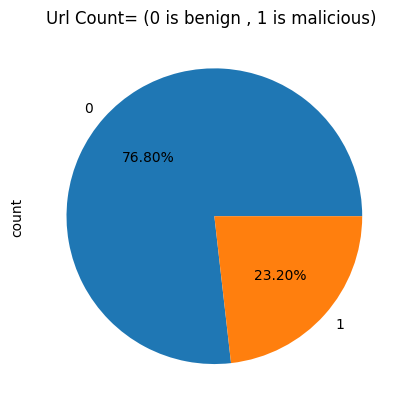

In [38]:
# Phishing Count in pie chart

df['result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Url Count= (0 is benign , 1 is malicious) ")
plt.show()

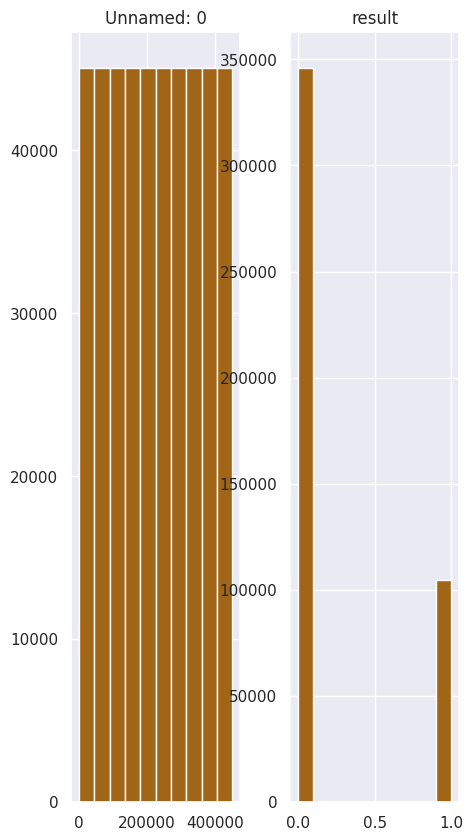

In [39]:
sns.set(palette='BrBG')
urls_data.hist(figsize=(5,10));

array([[<Axes: title={'center': 'result'}>]], dtype=object)

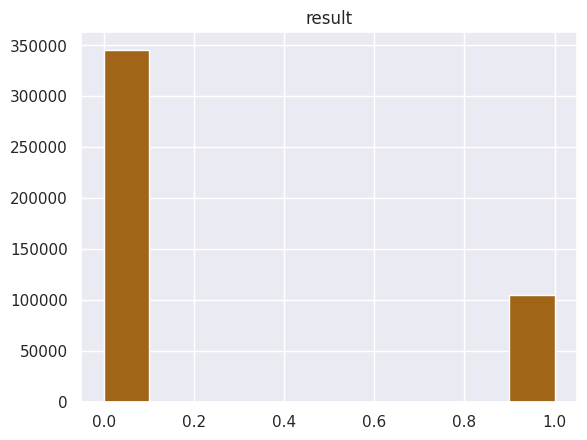

In [40]:
urls_data.hist(column='result')

----- END -------